In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import boxcox

In [4]:
## 구글 colab이랑 연결이후 파일 불러오기
df = pd.read_csv("/content/drive/MyDrive/simple_ml_for_sheets/car_prices.csv")
df.head(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


Description of the dataset columns
- Year: 차량의 제조년도 (2015), **int64**
- Make: 차량 제조 브랜드 (Kia, BMW, Volvo), **object**  
- Model: 차량의 특정 모델 ( Sorento, 3 Series, S60,), **object**  
- Trim: 모델의 특정 버전 또는 옵션 패키지\LX, 328i SULEV, T5, 650i)  , **object**
- Body: 차체 유형( SUV, Sedan)  , **object**
- Transmission: 변속기 (automatic)  , **object**
- VIN: 차량 식별 번호, 고유 코드  , **object**
- State: 차량이 소재하거나 등록된 주(CA for California) , **object**
- Condition: 차량 상태를 수치로 나타낸 것(5.0), **float64**  
- Odometer: 차량의 주행거리 또는 이동 거리  , **float64**
- Color: 차량의 외부 색상 , **object**
- Interior: 차량의 내부 색상  , **object**
- Seller: 차량을 판매하는 법인 또는 회사(예: 기아자동차 미국 법인, 금융 서비스 리마케팅) , **object**

- MMR: 자동차 업계에서 사용되는 가격 책정 도구 , **float64**  
- Selling Price: 차량이 판매된 가격, **float64**  
- Sale Date: 차량이 판매된 날짜 및 시간 , **object**


In [6]:
df['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'Navitgation', 'van', 'regular-cab',
       'g sedan', 'g coupe', 'hatchback', 'king cab', 'supercrew',
       'g convertible', 'coupe', 'crew cab', 'wagon', 'double cab',
       'e-series van', 'regular cab', 'quad cab', 'g37 convertible',
       'supercab', 'exten

In [ ]:
# 총 16개 컬럼의 558837 row, none 값 많음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [ ]:
# nan값 확인 , null이나 na를 사용하여 조회 하여도 동일한 값이 나온다
pd.concat([df.isnull().sum(), df.isna().sum()], axis=1, keys=['isnull', 'isna'])

,isnull,isna
year,0,0
make,83,83
model,223,223
trim,4869,4869
body,2991,2991
transmission,65352,65352
vin,4,4
state,0,0
condition,11820,11820
odometer,94,94


make 가 자동차의 브랜드임으로 고려할때 make의 none 값은 model과 trim의 none 값으로 이어 진다  
해당 3가지 컬럼과 가격에 영향이 높다고 생각되는 color 까지 Y값에 영향을 크게 주는 항목이라면  
특정값으로 대체하면 데이터 왜곡이 발생될수 있기에 가장 먼저 4가지 컬럼이 Y값에 영향을 주는 지 확인한다


vin 값이 차량 고유 번호라는 사실 확인 후 아래의 url에서 차량 정보를 vin 값과 매치되는 정보를 api 값으로 불러옴, body column에

**api 정보 업데이트 된 파일 사용**


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/simple_ml_for_sheets/updated_df_2.csv")
df.head(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,kia,sorento,lx,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,kia,sorento,lx,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,bmw,3 series,328i sulev,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,volvo,s60,t5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,bmw,6 series gran coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,nissan,altima,2.5 s,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,bmw,m5,base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,chevrolet,cruze,1lt,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,audi,a4,2.0t premium plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,chevrolet,camaro,lt,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


In [ ]:
#pd.concat([df.isnull().sum(), df.isna().sum()], axis=1, keys=['isnull', 'isna'])

pd.concat([df.isnull().sum(), df.isna().sum()], axis = 1 , keys=['isnull','isna'])

,isnull,isna
year,0,0
make,83,83
model,223,223
trim,4869,4869
body,2991,2991
transmission,65352,65352
vin,0,0
state,0,0
condition,11794,11794
odometer,94,94


api로 불러온 데이터 정리  
대문자 -> 소문자, 띄어쓰기 삭제

In [ ]:
# 제조사 이름을 소문자로 변환한 후 중복 처리
df['make'] = df['make'].str.lower()

# 중복된 제조사 이름을 통합하는 매핑
mapping = {
'landrover': 'land rover',
'mercedes': 'mercedes-benz',
'mercedes-b': 'mercedes-benz',
'vw': 'volkswagen',
'chev truck': 'chevrolet',

'ford tk': 'ford',
'ford truck': 'ford',
'mazda tk': 'mazda',
'gmc truck': 'gmc',
'dodge tk': 'dodge'
}

# 제조사 이름 통합
df['make'] = df['make'].replace(mapping)

# 통합된 결과 확인
df[df['make'] == "ford tk"]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate


In [ ]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547043.000000,558743.000000,558825.000000,558825.000000
mean,2010.038927,30.672188,68320.437548,13769.372657,13611.301368
std,3.966864,13.403260,53398.058707,9679.742249,9749.515881
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [ ]:
df.describe(include='object')

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,558754,558614,553968,555846,493485,558837,558837,558088,558088,558837,558825
unique,57,889,2013,100,4,550322,64,20,17,14263,3766
top,ford,altima,base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,95595,19349,56075,199448,475937,5,82945,110974,244347,19693,5334


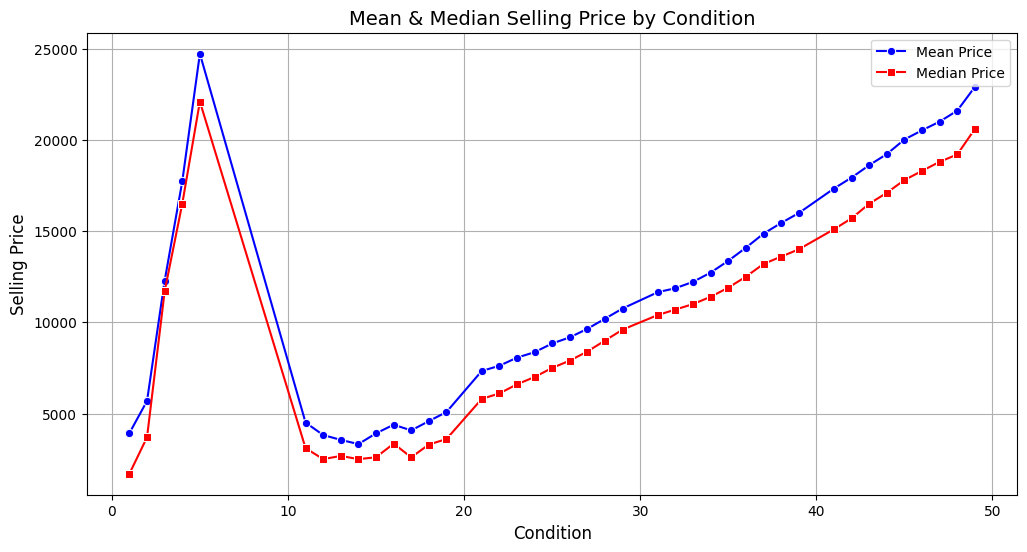

In [ ]:
stats_df = df.groupby(['condition'])['sellingprice'].agg(['mean', 'median'])

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 선 그래프 그리기
sns.lineplot(data=stats_df, x=stats_df.index, y='mean', marker='o', label='Mean Price', color='blue')
sns.lineplot(data=stats_df, x=stats_df.index, y='median', marker='s', label='Median Price', color='red')

# 그래프 제목 및 레이블 추가
plt.title('Mean & Median Selling Price by Condition', fontsize=14)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.legend()
plt.grid(True)

# 그래프 표시
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          558754 non-null  object 
 2   model         558614 non-null  object 
 3   trim          553968 non-null  object 
 4   body          555846 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558837 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558825 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [ ]:
df['transmission'].unique()
#세단이 왜???

array(['automatic', nan, 'manual', 'Sedan', 'sedan'], dtype=object)

In [ ]:
df[df['transmission'].isin(['Sedan', 'sedan'])]


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
461612,2015,volkswagen,jetta,se pzev w/connectivity,Sedan,Sedan,3vwd17aj3fm259017,3vwd17aj3fm259017,46.0,2711.0,white,black,black,14250.0,14000.0,14000
505299,2015,volkswagen,jetta,se pzev w/connectivity,sedan,sedan,3vwd17aj7fm222388,3vwd17aj7fm222388,36.0,20379.0,silver,black,black,13600.0,13500.0,13500
529009,2015,volkswagen,jetta,se pzev w/connectivity,sedan,sedan,3vwd17aj8fm298895,3vwd17aj8fm298895,2.0,2817.0,red,black,black,13750.0,12200.0,12200
551222,2015,volkswagen,jetta,se pzev w/connectivity,sedan,sedan,3vwd17aj8fm239622,3vwd17aj8fm239622,2.0,9562.0,silver,black,black,13200.0,12100.0,12100


In [ ]:
df[df['transmission'].isna()].groupby('year').count()

,Unnamed: 0,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
year,,,,,,,,,,,,,,,,
1986,2,2,2,0,2,0,2,2,2,2,2,2,2,2,2,2
1989,1,1,1,0,1,0,1,1,1,1,0,0,1,1,1,1
1990,8,8,8,8,7,0,8,8,7,8,8,8,8,8,8,8
1991,7,7,7,7,6,0,7,7,7,7,7,7,7,7,7,7
1992,18,18,18,17,18,0,18,18,16,18,18,18,18,18,18,18
1993,34,34,34,33,33,0,34,34,32,34,33,33,34,34,34,34
1994,51,51,51,46,49,0,51,51,49,51,50,50,51,51,51,51
1995,109,109,109,99,107,0,109,109,102,108,109,109,109,109,109,109
1996,119,119,119,115,119,0,119,119,102,119,117,117,119,119,119,119


In [ ]:
temp = df.groupby('year')['transmission'].value_counts(dropna = False).reset_index()
temp[temp['transmission'].isna()]

,year,transmission,count
7,1986,NaN,2
13,1989,NaN,1
16,1990,NaN,8
18,1991,NaN,7
21,1992,NaN,18
24,1993,NaN,34
27,1994,NaN,51
30,1995,NaN,109
33,1996,NaN,119
36,1997,NaN,206


In [ ]:
# 수민님 컬럼값 축소
df['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'Sedan/Saloon', 'SuperCrew', 'CTS Coupe',
       'Extended Cab', 'E-Series Van', 'SuperCab', 'Regular Cab',
       'G Convertible', 'Koup',
       'Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)',
       'Quad Cab', 'CTS-V Coupe', 'Pickup', 'sedan', 'G37 Convertible',
       'Convertible/Cabriolet', 'Club Cab', 'Xtracab', 'Q60 Convertible',
       'CTS Wagon', 'convertible', 'Incomplete - Cutaway', 'G37 Coupe',
       'Cargo Van', 'Hatchback/Liftback/Notchback',
       'Incomplete - Chassis Cab (Single Cab)', 'Mega Cab', 'Cab Plus 4',
       'Q60 Coupe', 'Incomplete - Chassis Cab (Number of Cab Unknown)',
       'Cab Plus', 'Beetle Convertible', 'TSX Sport Wagon',
       'Promaster Cargo Van', 'Roadster', 'GranTurismo Convertible',
       'Incom

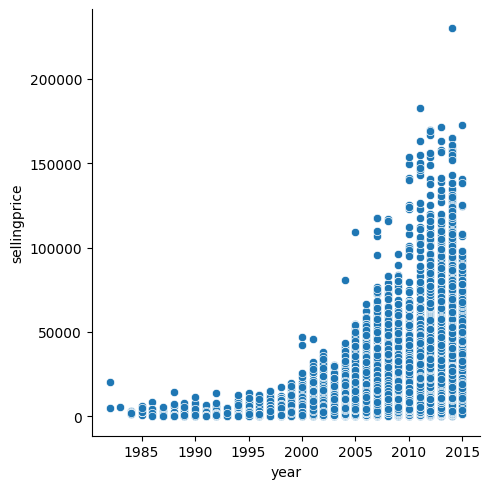

In [ ]:
# sns.scatterplot(data=df, x='year', y='sellingprice')
sns.relplot(data=df, x='year', y='sellingprice')

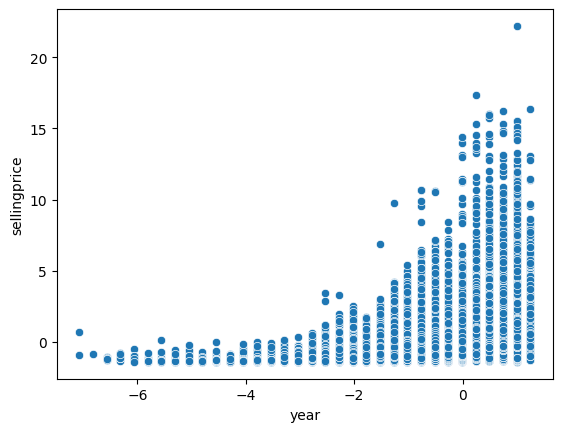

In [ ]:
year_zc = zscore(df['year'])
df_cleaned = df.dropna(subset=['sellingprice'])

# Z-score 계산
y_zc = zscore(df_cleaned['sellingprice'])

sns.scatterplot(x=year_zc, y=y_zc)



In [ ]:
print(np.min(year_zc), np.max(year_zc))
print(np.min(y_zc), np.max(y_zc))

-7.0682925044816445 1.2506296277275981
nan nan


In [ ]:
len(df['body'].unique())

101

In [ ]:
df_1 = pd.read_csv("/content/drive/MyDrive/simple_ml_for_sheets/updated_df_3.csv")
len(df_1['body'].unique())

16

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          558754 non-null  object 
 2   model         558614 non-null  object 
 3   trim          553968 non-null  object 
 4   body          555846 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558837 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558825 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


<Axes: xlabel='odometer', ylabel='sellingprice'>

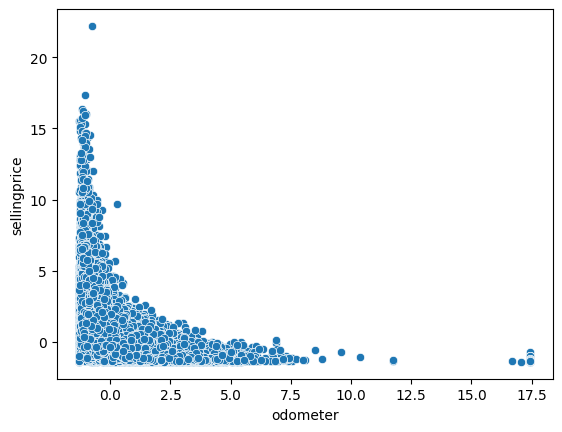

In [ ]:
df_cleaned_o = df.dropna(subset=['odometer'])
df_cleaned = df.dropna(subset=['sellingprice'])

# Z-score 계산
y_zc = zscore(df_cleaned['sellingprice'])
odometer_zc = zscore(df_cleaned_o['odometer'])

sns.scatterplot(x=odometer_zc, y=y_zc)

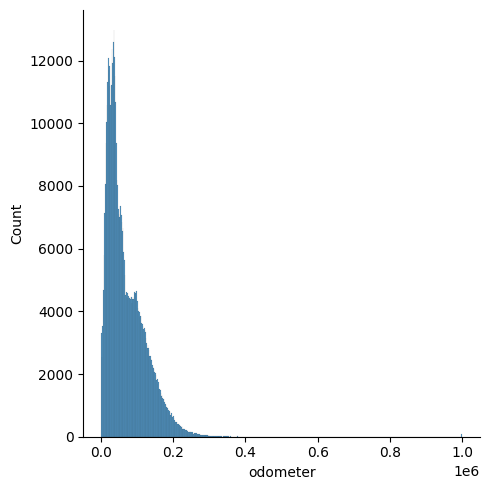

In [ ]:
sns.displot(data = df , x= 'odometer')

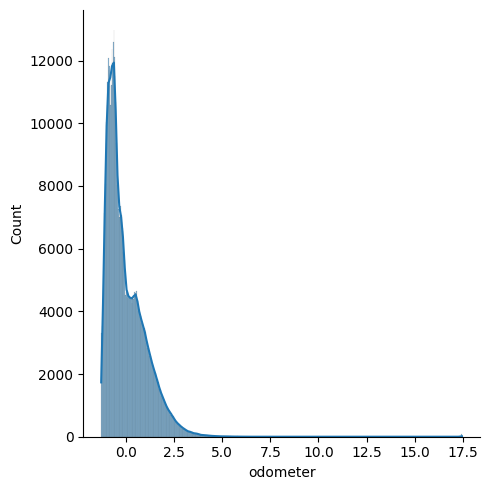

In [ ]:
df_cleaned_o = df.dropna(subset=['odometer'])

# Z-score 변환
odometer_zc = zscore(df_cleaned_o['odometer'])

# Seaborn displot에서 데이터를 직접 넣기
sns.displot(odometer_zc, kde=True)

In [ ]:
df['odometer'].agg(['min', max])


<ipython-input-139-3aaf01fc11b5>:1: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df['odometer'].agg(['min', max])


,odometer
min,1.0
max,999999.0


<Axes: ylabel='Count'>

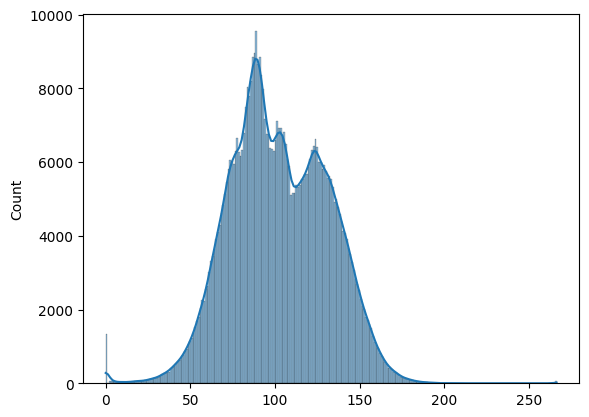

In [ ]:
odometer_positive = df[df['odometer'] > 0]['odometer']
odometer_boxcox, lam = boxcox(odometer_positive)

# 그래프 그리기
sns.histplot(odometer_boxcox, kde=True)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
2690,2010,ford,crown victoria,NaN,Sedan/Saloon,automatic,2fabp7bv5ax113795,ca,2.0,NaN,white,black,enterprise fm exchange/tra/lease,3700.0,2200.0,Tue Jan 27 2015 04:00:00 GMT-0800 (PST)
3360,2007,ford,edge,sel,SUV,NaN,2fmdk38c77bb39171,ca,32.0,NaN,gray,—,valley kia,2775.0,15500.0,Thu Jun 18 2015 05:00:00 GMT-0700 (PDT)
4158,2005,chevrolet,equinox,ls,SUV,NaN,2cndl13f056137366,ca,NaN,NaN,NaN,NaN,buena park honda,3250.0,27500.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
4301,2005,nissan,murano,sl,SUV,NaN,jn8az08t75w326816,ca,NaN,NaN,black,—,long beach bmw & long beach mini,4900.0,400.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
4685,2003,bmw,7 series,745li,Sedan,NaN,wbagn63403ds43612,ca,NaN,NaN,NaN,NaN,prestige auto wholesale inc,4900.0,3700.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442975,2012,bmw,x5,xdrive35d,SUV,automatic,5uxzw0c56cl673311,ca,29.0,NaN,black,brown,financial services remarketing/rail cars,34700.0,35000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
490195,2006,mitsubishi,lancer,NaN,Sedan/Saloon,manual,ja3aj16e16u070827,pr,21.0,NaN,gray,gray,oriental bank,2900.0,1700.0,Thu Jun 04 2015 04:00:00 GMT-0700 (PDT)
527660,2008,ford,f-150,xlt,supercrew,automatic,1ftpw14v48kd08698,mi,36.0,NaN,black,black,larry hudson chevrolet buick gmc inc,15650.0,16700.0,Thu Jul 02 2015 06:30:00 GMT-0700 (PDT)
550569,2010,chevrolet,equinox,lt1,suv,NaN,2cnfleew4a6364759,ab,1.0,NaN,blue,black,go auto finance,8550.0,6750.0,Thu Jun 18 2015 04:30:00 GMT-0700 (PDT)


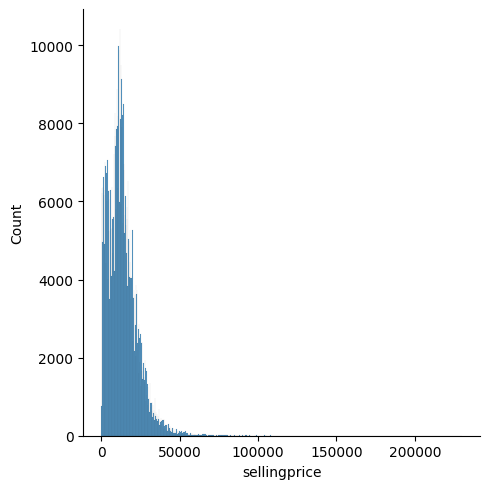

In [ ]:
sns.displot(data = df, x = 'sellingprice')
#왼쪽으로 치우친 데이터

<Axes: ylabel='Count'>

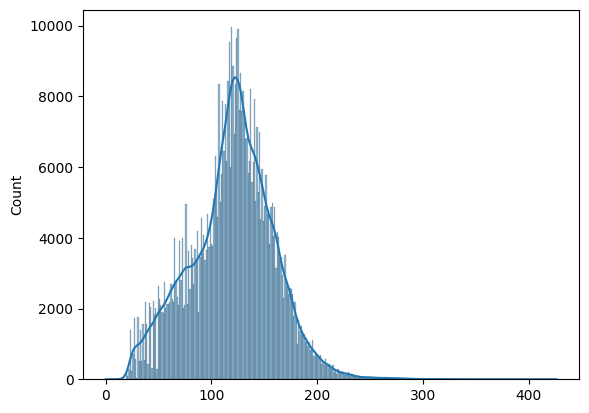

In [ ]:
sellingprice_p = df[df['sellingprice'] > 0]['sellingprice']
price_boxcox, lam = boxcox(sellingprice_p)

# 그래프 그리기
sns.histplot(price_boxcox, kde=True)

<Axes: xlabel='sellingprice', ylabel='Count'>

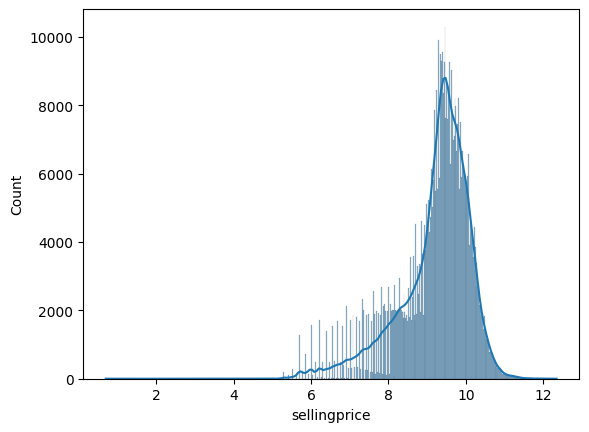

In [ ]:
sellingprice_p = df[df['sellingprice'] > 0]['sellingprice']
# 로그 변환
y_log = np.log1p(sellingprice_p)
#히스토그램
sns.histplot(y_log, kde=True)




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          558754 non-null  object 
 2   model         558614 non-null  object 
 3   trim          553968 non-null  object 
 4   body          555846 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558837 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558825 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [ ]:
len(df['color'].unique())
#21개의 고유값

21

<Axes: xlabel='color', ylabel='sellingprice'>

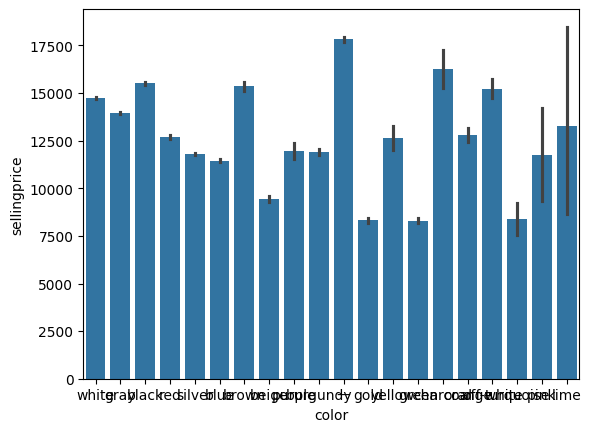

In [ ]:
sns.barplot(data=df, x='color', y='sellingprice', estimator=np.mean)

<Axes: xlabel='color', ylabel='sellingprice'>

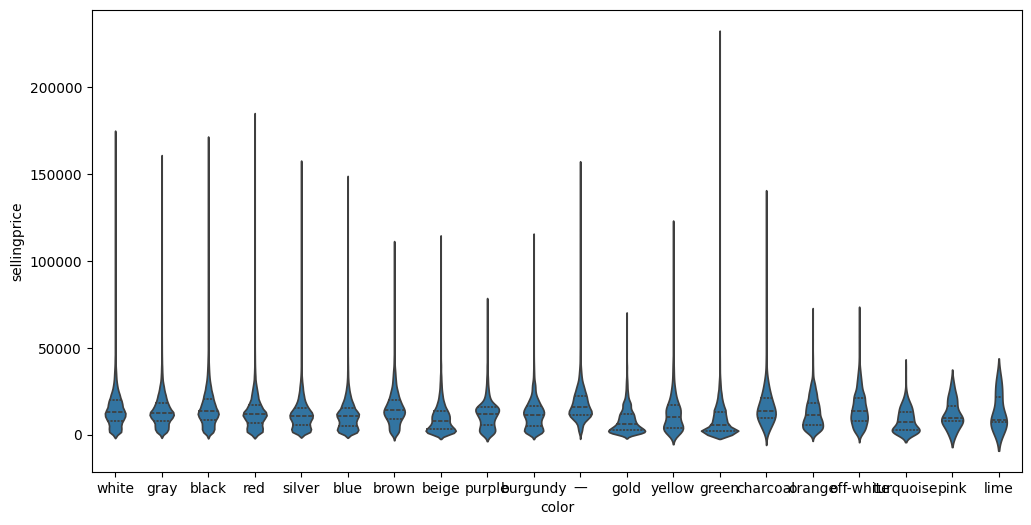

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='color', y='sellingprice', inner="quartile")

In [ ]:
sns.displot(data=df, x='seller')

Error in callback <function flush_figures at 0x7b09b3163060> (for post_execute):


KeyboardInterrupt: 

<Axes: xlabel='interior', ylabel='sellingprice'>

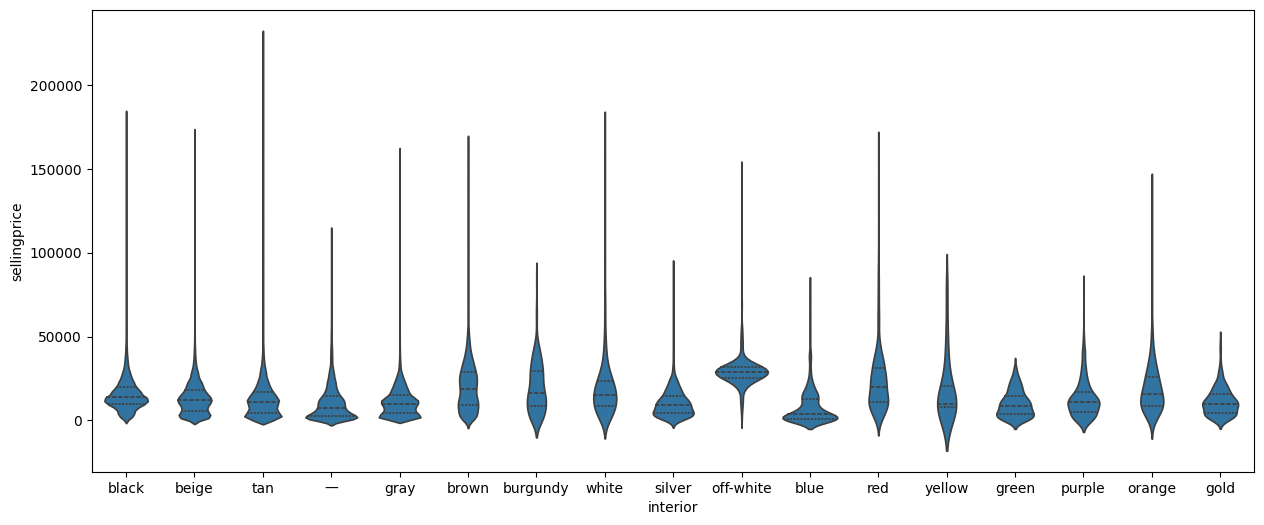

In [ ]:
plt.figure(figsize=(15, 6))
sns.violinplot(data=df, x='interior', y='sellingprice', inner="quartile")

In [ ]:
len(df['interior'].unique())

18

## 전처리 된 csv 파일 사용


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/simple_ml_for_sheets/updated_df_4.csv")
df.head(10)

NameError: name 'pd' is not defined